In [1]:
# install below libraries
# langchain, pydantic, langgraph, langchain-core, langchain-community

# Build simple workflow or graph Using Langgraph

## state

First, define the state of the graph

The State Schema serves as the input schema for all Nodes and Edges in the graph

Let's use TypeDict class from python's typing module as our schema, which provides type 

In [2]:
from typing_extensions import TypedDict # whenever graph is executed it will retain the data in to the dict

class State(TypedDict): # whatever the i/p varible i am giving those will be stored here
    graph_info: str

In [3]:
# Think How many nodes are there play, badmintion, cricket
# Nodes are basically python functions
# after this simple process, the LLM will place this functions and performs the action

def start_play(state: State):
    print("Start Play node has been called")
    # return is important, whenever node is executed, the group_info should append to the group_info. this we have to write it in a dict because we are using TypeDict
    return {"graph_info": state['graph_info'] + "I am planning to Play"} 


def play_cricket(state:State):
    print("Cricket node has been called")
    # initially start_play will be executed (I am planning to play), if agent selected as play_cricket it will append as (I am Planning to Play Cricket)
    return {"graph_info": state["graph_info"] + "Cricket"} 


def play_badmintion(state:State):
    print("Badmintion node has been called")
    return {"graph_info": state["graph_info"] + "Badmintion"} 

we have defined the nodes, now which node should call?

that will define in the **state file**

#### Define a flow

In [4]:
import random
from typing import Literal # literal is a constant, play has to decide cricket or badmintion, that decided by constant (Literal)


def random_play(state: State)-> Literal['play_cricket', 'play_badmintion']:
    if random.random() > 0.5:
        return "play_cricket"
    else:
        return "play_badmintion"

### Design the entire graph

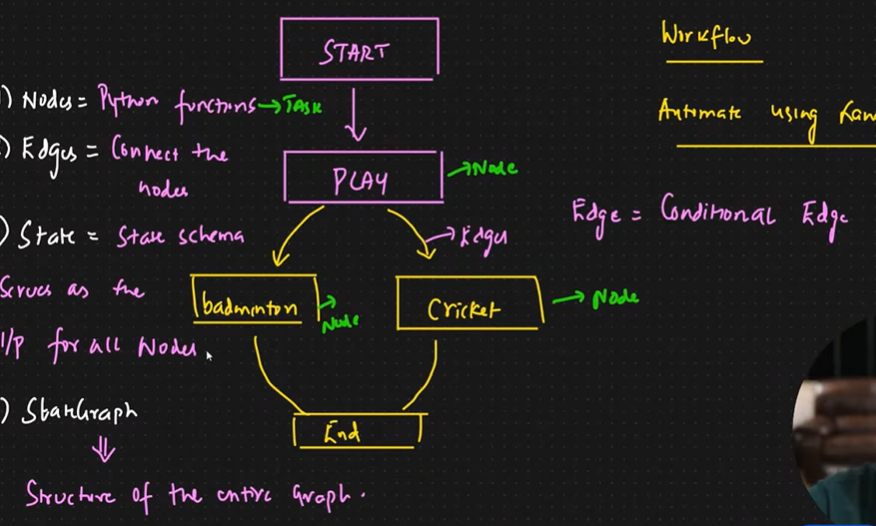

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# StateGraph => Defines the entire structure of the Graph
# START => start of the graph
# END => End of the graph

step - 1

In [6]:
# step -1 initialize the state graph
# empty graph

graph = StateGraph(State) # initialization the graph

step -2

In [7]:
# step -2 add all the nodes
graph.add_node("start_play", start_play)
graph.add_node("play_cricket", play_cricket)
graph.add_node("play_badmintion", play_badmintion)

step - 3

In [8]:
# step - 3 Schedule the floe of the graph
# start to play

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play) # the output of this is eith play cricket or play badmintion
graph.add_edge("play_cricket", END)
graph.add_edge("play_badmintion", END)


## Run the graph

Before running the graph, it should compile the graph

step -4

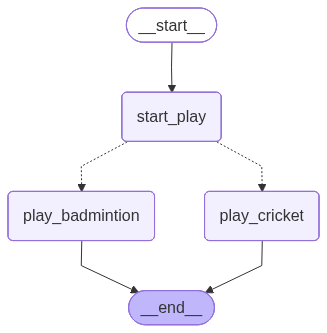

In [9]:
# compile the graph
graph_builder = graph.compile()


# View the graph, whether it has been created correctly or not
display(Image(graph_builder.get_graph().draw_mermaid_png()))

### Execute the Flow but how, see below

In [11]:
# graph_info you have to provide because you defined graph_info in State

graph_builder.invoke({"graph_info": "My Name is Raju" })

Start Play node has been called
Cricket node has been called


{'graph_info': 'My Name is RajuI am planning to PlayCricket'}